# Multi-session analysis
This notebook demonstrate how to combine different xarray dataset together and perform group-level analysis

In [1]:
import xarray as xr
import matplotlib.pylab as plt
import seaborn as sns
from pathlib import Path
import pandas as pd
from tqdm import tqdm

## Loading data

In [2]:
dataaset = xr.open_mfdataset('Z:\\Teris\\ASAP\\expt_sessions\\RE603*\\processed\\xr_session.nc',
                             combine='nested', engine='h5netcdf')

In [3]:
f1 = r'Z:/Teris/ASAP/expt_sessions/RE603-2023-03-24-083953/processed/xr_session.nc'
f2 = r'Z:/Teris/ASAP/expt_sessions/RE603-2023-03-21-152900/processed/xr_session.nc'

d1= xr.open_dataset(f1)
d2  = xr.open_dataset(f2)

In [4]:
from glob import glob
fns = glob(r'Z:/Teris/ASAP/expt_sessions/kms064*/processed/xr_session.nc')

In [21]:
ds_combined = xr.open_mfdataset(r'Z:/Teris/ASAP/expt_sessions/kms058*/processed/xr_session.nc',
                                concat_dim='session', combine='nested', chunks={'session':5})

In [22]:
ds_combined

<xarray.Dataset>
Dimensions:                  (time: 668560, session: 15)
Coordinates:
  * time                     (time) float64 1.78e+04 1.785e+04 ... 3.686e+06
Dimensions without coordinates: session
Data variables: (12/26)
    trial_nb                 (session, time) float64 dask.array<chunksize=(1, 668560), meta=np.ndarray>
    uid                      (session, time) object dask.array<chunksize=(1, 668560), meta=np.ndarray>
    trigger                  (session, time) object dask.array<chunksize=(1, 668560), meta=np.ndarray>
    valid                    (session, time) float64 dask.array<chunksize=(1, 668560), meta=np.ndarray>
    break_after_abort        (session, time) float64 dask.array<chunksize=(1, 668560), meta=np.ndarray>
    US_end_timer             (session, time) float64 dask.array<chunksize=(1, 668560), meta=np.ndarray>
    ...                       ...
    analog_1_filt            (session, time) float64 dask.array<chunksize=(1, 668560), meta=np.ndarray>
    analog_2_filt            (session, time) float64 dask.array<chunksize=(1, 668560), meta=np.ndarray>
    analog_1_df_over_f       (session, time) float64 dask.array<chunksize=(1, 668560), meta=np.ndarray>
    rel_time_hold_for_water  (session, time) float64 dask.array<chunksize=(1, 668560), meta=np.ndarray>
    rel_time_first_bar_off   (session, time) float64 dask.array<chunksize=(1, 668560), meta=np.ndarray>
    rel_time_spout           (session, time) float64 dask.array<chunksize=(1, 668560), meta=np.ndarray>
Attributes: (12/19)
    pulse_inds_1:         []
    pulse_inds_2:         [   9674   15648   24450   32623   36322   45442   ...
    pulse_times_1:        []
    pulse_times_2:        [   9674.   15648.   24450.   32623.   36322.   454...
    subject_ID:           RE602
    date_time:            2023-03-16T09:19:20
    ...                   ...
    Task file hash:       2536334725
    Setup ID:             COM3
    Framework version:    1.8.1
    Micropython version:  1.13
    Subject ID:           RE602
    Start date:           2023/03/16 09:19:35

<AxesSubplot: xlabel='rel_time_spout', ylabel='analog_1_df_over_f'>

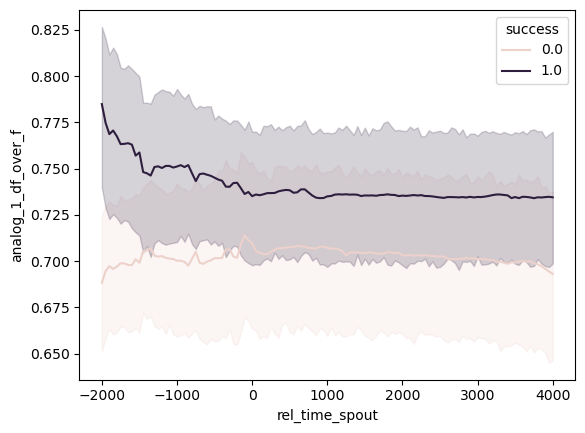

In [23]:
df2plot=ds_combined[['rel_time_spout','analog_1_df_over_f','success']].to_dataframe().reset_index()
sns.lineplot(x='rel_time_spout',hue='success',
            y='analog_1_df_over_f', data=df2plot)

In [5]:
session_id = []

ds_all =[]

for fn in tqdm(fns):
    ds = xr.open_dataset(fn)
    ds_all.append(ds)
    session_id.append(Path(fn).parent.parent.name)
    
    

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:06<00:00,  3.52it/s]


In [66]:
ds_combined = xr.concat(ds_all, pd.Index(session_id, name='session_id'), data_vars=['analog_1_df_over_f'])


MergeError: conflicting values for variable 'trial_nb' on objects to be combined. You can skip this check by specifying compat='override'.

In [46]:
ds_combined

<xarray.Dataset>
Dimensions:                  (time: 668560, session_id: 15)
Coordinates:
  * time                     (time) float64 1.78e+04 1.785e+04 ... 3.686e+06
  * session_id               (session_id) object 'RE602-2023-03-16-091935' .....
Data variables: (12/26)
    trial_nb                 (session_id, time) float64 nan nan ... 275.0 275.0
    uid                      (session_id, time) object nan ... 'RE604_2023-03...
    trigger                  (session_id, time) object nan ... 'hold_for_water'
    valid                    (session_id, time) float64 nan nan nan ... 1.0 1.0
    break_after_abort        (session_id, time) float64 nan nan nan ... 0.0 0.0
    US_end_timer             (session_id, time) float64 nan nan nan ... 1.0 1.0
    ...                       ...
    analog_1_filt            (session_id, time) float64 nan nan ... 0.5616
    analog_2_filt            (session_id, time) float64 nan nan ... 3.316 3.316
    analog_1_df_over_f       (session_id, time) float64 nan nan ... 1.002 1.0
    rel_time_hold_for_water  (session_id, time) float64 nan nan nan ... nan nan
    rel_time_first_bar_off   (session_id, time) float64 nan nan nan ... nan nan
    rel_time_spout           (session_id, time) float64 nan nan nan ... nan nan
Attributes: (12/19)
    pulse_inds_1:         []
    pulse_inds_2:         [   9674   15648   24450   32623   36322   45442   ...
    pulse_times_1:        []
    pulse_times_2:        [   9674.   15648.   24450.   32623.   36322.   454...
    subject_ID:           RE602
    date_time:            2023-03-16T09:19:20
    ...                   ...
    Task file hash:       2536334725
    Setup ID:             COM3
    Framework version:    1.8.1
    Micropython version:  1.13
    Subject ID:           RE602
    Start date:           2023/03/16 09:19:35

In [58]:
df2plot=ds_combined[['rel_time_spout','analog_1_df_over_f','success']].to_dataframe().reset_index()

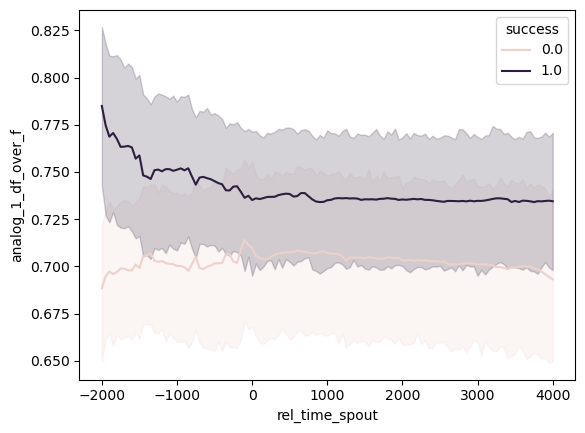

In [61]:
# fig, ax = plt.subplots(1,1,dpi=300, figsize=(6,6))

ax = sns.lineplot(x='rel_time_spout',hue='success',
            y='analog_1_df_over_f', data=df2plot)